In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("Titanic.xlsx")


In [3]:
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]

# Encode Sex
df['Sex'] = df['Sex'].map({'male':0,'female':1})

# Fill missing Age
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_19952\1127771258.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df)


In [28]:
db = DBSCAN(eps=0.8, min_samples=10)
clusters = db.fit_predict(X)

df['Cluster'] = clusters


In [29]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,5
887,1,1,19.0,0,0,30.0000,10
888,3,1,28.0,1,2,23.4500,-1
889,1,0,26.0,0,0,30.0000,4


In [30]:
print(df['Cluster'].value_counts())


Cluster
-1     288
 3     262
 4      70
 5      69
 1      59
 8      31
 0      24
 6      21
 10     20
 7      18
 2      16
 9      13
Name: count, dtype: int64


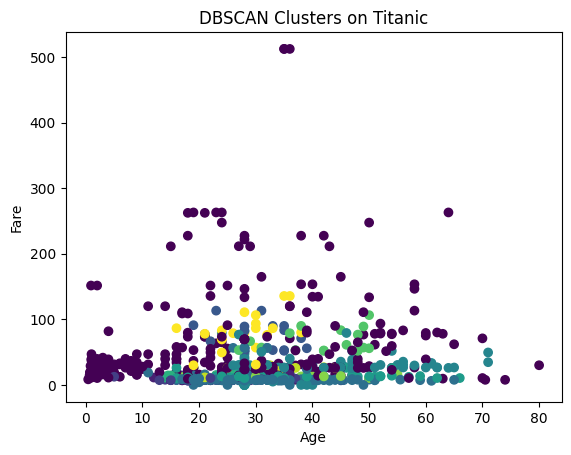

In [23]:
plt.scatter(df['Age'], df['Fare'], c=df['Cluster'])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("DBSCAN Clusters on Titanic")
plt.show()


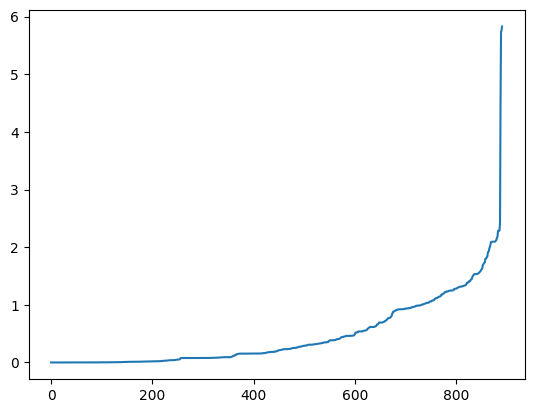

In [24]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:,4])
plt.plot(distances)
plt.show()


In [ ]:
Eps -constant
minpoint -incereae
noise -increase
no of clustors = decrease

In [ ]:
minpoint-constant
eps -increase
noise=reduce
no of clusters=reduce